<a href="https://colab.research.google.com/github/marceloccs/deep_learning_pos_ai/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Trilha_4_Uso_de_TF_como_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nome:** Marcelo Custodio Cruz Silva

##**Matricula:** 92123341

---

##**Curso:** Inteligencia Artificial

##**Turma:** B

*Link do arquivo no google colabs: https://colab.research.google.com/drive/1Ty1NDVfJz3C57bwZiaujLR4GgjIhlPWn?usp=sharing*

*Link do arquivo no github:https://github.com/marceloccs/deep_learning_pos_ai/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Trilha_4_Uso_de_TF_como_tensor.ipynb* 

#Trilha 4: Tarefa (Peso 3)

Nesta tarefa você deve implementar um modelo de classificação binária ou multiclasse para um conjunto de dados de seu interesse. Não empregue dados genéricos de uso de didático e já disponíveis em pacotes como iris, mtcars, Cars93, titanic, tips etc. Se tiver dúvida sobre a sua base consulte o professor (ver cadastro abaixo). A ideia e que você empregue dados de um problema de seu interesse e desenvolva um trabalho original. 

O resultado do seu modelo deve ser acima de 0.8 de acuracidade sobre o conjunto de teste (0.3 dos dados de treinamento). Em alguns casos, se não conseguir alcançar essa acuracidade, isso não invalida o seu trabalho mas é importante justificar. 

Antes de começar, selecione uma base de dados. Você deve compartilhar as informações da base empregada (nome, descrição, link) para que não haja bases repetidas entre os seus colegas. (O professor irá prover uma área compartilhada para isso: aqui > https://docs.google.com/spreadsheets/d/1wK66ezMKC-DSjd3R9FPWSLxCvRUfeXhb/edit?usp=sharing&ouid=102152623479619184236&rtpof=true&sd=true).

Você deve implementar o seu modelo com o Keras TensorFlow empregando o modelo fornecido de código. Importante, você estará criando um notebook, é esperado portanto que as seções sejam devidamente comentadas sobre o que feito e as escolhas realizadas. Introduza o problema que você está resolvendo, comente o modelo construído e ao final não esqueça de fazer uma conclusão da tarefa realizada. Não precisam ser comentários extensos, mas eles precisam deixar claro para qualquer pessoa 'ler' o texto entenda o que você desenvolveu. Quaisquer modos de programação, Modelo Sequencial, API Funcional ou Sub Classes, podem ser igualmente empregados mas o modelo sequencial será preferível pela facilidade. Seu modelo deve apresentar, no mínimo, 0.8 de acuracidade.
 
**Ao final, apresente suas conclusões.**

*Enviar a atividade em .pdf juntamente com o endereço do Python notebook 100% executável que pode aparecer no início do pdf.*

*ATUALIZAÇÃO (14.11.2021): +2 Modelos de Classificação, um Binária e outro Multiclass. Podem empregar como modelo para a atividade: https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/DL_TensorFlow_Binary_and_Multiclass_Classification.ipynb*

##Preparos iniciais do modelo

###Imports para dependencias necessarias ao decorrer do modelo.

In [62]:
#Manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Tnsorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
#Auxiliar para leitura e print de dados
from IPython.display import display

###Leitura do arquivo para predição de cogumelos.

*Modelo de classificação binária para identificação se o cogumelo, pelas suas características físicas, é comestível ou venenoso.*

**Link Kaggle:** https://archive.ics.uci.edu/ml/datasets/Mushroom

**Link Github:** https://raw.githubusercontent.com/marceloccs/pos-ai-files/main/Trilha%204%20Uso%20de%20tensores%20com%20TenserFlow/agaricus-lepiota.data

A seguir é utilizado um dataset contendo diversas especies de cogumelos, as características vão ser utilizadas para definir se o cogumelo é venenoso ou comestível. Para realizar esse predição é utilizado o modelo de classificação binária.

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/marceloccs/pos-ai-files/main/Trilha%204%20Uso%20de%20tensores%20com%20TenserFlow/agaricus-lepiota.data')
df = df.dropna()
display(df.head())

,classe,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


###Informações de atributos: 



     1. classes: comestíveis = e, venenosos = p
     2. forma de capa: sino = b, cônico = c, convexo = x, plano = f,knobbed = k, sunken = s
     3. superfície da capa: fibrosa = f, ranhuras = g, escamosa = y, lisa = s
     4. cor da tampa: marrom = n, amarelo-claro = b, canela = c, cinza = g, verde = r, rosa = p, roxo = u, vermelho = e, branco = w, amarelo = y
     5. hematomas ?: hematomas = t, não = f
     6. odor: amêndoa = a, anis = l, creosoto = c, peixe = y, fétido = f, mofo = m, nenhum = n, picante = p, picante = s 
     7. anexo de brânquia: anexado = a, descendente = d, livre = f, entalhado = n
     8. espaçamento entre guelras: próximo = c, lotado = w, distante = d
     9. tamanho da guelra: largo = b, estreito = n
     10. cor das guelras: preto = k, marrom = n, amarelo-claro = b, chocolate = h, cinza = g, verde = r, laranja = o, rosa = p, roxo = u, vermelho = e, branco = w, amarelo = y
     11. formato de haste: ampliação = e, afilamento = t
     12. raiz do caule: bulboso = b, clube = c, xícara = u, igual = e, rizomorfos = z, enraizado = r, ausente =?
     13. superfície da haste acima do anel: fibroso = f, escamoso = y, sedoso = k, liso = s
     14. superfície do caule abaixo do anel: fibroso = f, escamoso = y, sedoso = k, liso = s
     15. haste-cor-acima do anel: marrom = n, amarelo-claro = b, canela = c, cinza = g, laranja = o, rosa = p, vermelho = e, branco = w, amarelo = y
     16. cor-do-caule abaixo do anel: marrom = n, amarelo-claro = b, canela = c, cinza = g, laranja = o, rosa = p, vermelho = e, branco = w, amarelo = y
     17. tipo de véu: parcial = p, universal = u 
     18. cor do véu: marrom = n, laranja = o, branco = w, amarelo = y
     19. número do anel: nenhum = n, um = o, dois = t 19. tipo de anel: teia de aranha = c, evanescente = e, alargamento = f, grande = l, nenhum = n, pendente = p, revestimento = s, zona = z
     20. spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, laranja = o, roxo = u, branco = w, amarelo = y
     21. população: abundante = a, agrupado = c, numeroso = n, espalhado = s, vários = v, solitário = y
     22. habitat: gramíneas = g, folhas = l, prados = m, caminhos = p, urbano = u, desperdício = w, madeiras = d

###Contagem de cogumelos por classe:

In [64]:
dfCount = df['classe'].value_counts()
display(dfCount)

e    4208
p    3916
Name: classe, dtype: int64

####Função Auxiliar para leitura descretização

*Como o modelo é para classificação binária, é necessario valores numéricos no modelo*
 
A função abaixo faz um Labbel enconder por valores na coluna, realizando uma discretização de valores.

In [65]:
def dataframeEncoding(dataframe):
    le = LabelEncoder()
    for i in range(len(dataframe.columns)):
        le.fit(dataframe.iloc[:,i])
        dataframe.iloc[:,i]  = le.transform(dataframe.iloc[:,i])
    return dataframe

In [66]:
df = dataframeEncoding(df)
display(df.head())

,classe,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


##Inicio do modelo, treinamento e resultado  

###Separação de modelos de teste e de treinamento

*Separando os grupos de teste e treino, com o tamanho de teste de 30% (ou 0.3) do modelo todo*

In [67]:
dfClassificacao = df.copy()
X = dfClassificacao.drop('classe', axis=1)
y = dfClassificacao[['classe']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
display(X_train.head())
display(y_train.head())

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
716,0,2,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,3,3
36,4,0,3,0,5,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,4,5
336,5,3,4,1,0,1,0,0,10,0,4,2,3,7,7,0,2,1,4,2,5,1
8084,0,0,3,0,5,1,1,0,7,0,0,1,1,7,7,0,2,2,4,7,3,1
960,5,0,4,0,5,1,1,0,5,1,3,0,0,7,7,0,2,1,0,2,0,1


,classe
716,0
36,0
336,0
8084,0
960,0


###Modelo de aprendizado binario

**Abaixo o modelo criado possui 4 camadas**
1.   Camada com sigmoid, para trabalhar com valores de classes binaria e valores numéricos. *Valores de entrada e de neurônios com o tamanho de colunas do conjunto de treino com as características numéricas*
2.   Camada de regressão linear.
3.   Camada para Dropout, para evitar o overfitting do modelo.
4.   Camada de saída com sigmoid novamente. *Criado com o valor de entrada de neurônios com o a quantidade de colunas do conjunto de treinamento com os valores de classe*

**Função de perda é utilizado o "*binary_crossentropy*", como otimizado do modelo o "*adam*" e a métrica de "*accuracy*" para demonstração da efetividade do modelo**

In [68]:
model = keras.Sequential([
    layers.Dense(X_train.shape[1],activation='sigmoid', input_shape=[X_train.shape[1]]),
    layers.Dense(X_train.shape[1]/2,activation='relu' ),
    layers.Dropout(0.5),
    layers.Dense(y_train.shape[1],activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(np.array(X_train).astype("int"),np.array(y_train).astype("int"),validation_split=0.3,epochs=10,batch_size=32)

Epoch 1/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6162 - accuracy: 0.6731 - val_loss: 0.5241 - val_accuracy: 0.8664
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.8060 - val_loss: 0.4037 - val_accuracy: 0.8945
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8631 - val_loss: 0.3134 - val_accuracy: 0.9115
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8927 - val_loss: 0.2544 - val_accuracy: 0.9256
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2885 - accuracy: 0.9126 - val_loss: 0.2236 - val_accuracy: 0.9320
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9251 - val_loss: 0.2026 - val_accuracy: 0.9343
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9276 - val_loss: 0.1790 - val_accuracy: 0.9373
Epoch 

###Funções de auxilio para visualização do resultado do modelo.

In [69]:
def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  print('\n\nLearning Curve... \n\n')
  print('\n', history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, [history_df.columns[1], history_df.columns[3]]].plot()

  print(("\nBest Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df[history_df.columns[2]].min(), 
              history_df[history_df.columns[3]].max()))
  print('\n ')
  return

def print_results(y_test, y_pred):
  print('\nClassification Report: \n\n', classification_report(y_test, y_pred))
  print('\nAccuracy Score: \n\n', accuracy_score(y_test, y_pred), '\n')
  return

###Resultado do aprendizado:


Confusion Matrix: 

 [[2438]]

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2438

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Accuracy Score: 

 1.0 



Learning Curve... 



        loss  accuracy  val_loss  val_accuracy
0  0.616178  0.673116  0.524065      0.866354
1  0.496340  0.806030  0.403696      0.894490
2  0.410213  0.863065  0.313449      0.911489
3  0.333629  0.892714  0.254425      0.925557
4  0.288465  0.912563  0.223625      0.932005

Best Validation Loss: 0.1332
Best Validation Accuracy: 0.9414

 


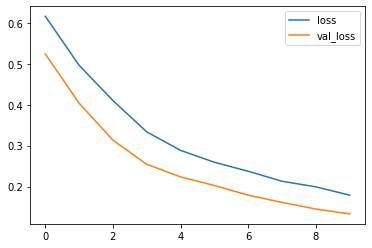

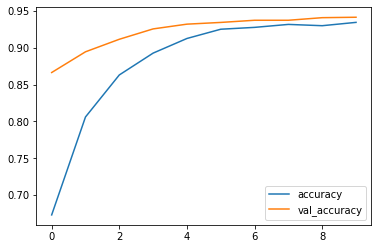

In [70]:
y_pred_one = np.argmax(model.predict(X_test), axis=1)
y_test_one = np.argmax(np.array(y_test), axis=1)

print_results(y_test_one, y_pred_one)
display_acc_hist(history)

##Conclusão

O modelo de classificação binária apresentou bons resultados ao modelo utilizado, pois o mesmo possui características bem distintas entre cada uma das classes, cogumelo comestível ou venenoso. Antes de iniciar o trabalho com esse modelo, foram iniciados outros trabalhos de classificação para modelos de Cervejas e para o modelo de estilos musicais. Nos modelos anteriores não apresentaram muita acurácia, por esse motivo foram descartados, o ocorrido se justifica pois as classes presentes de cada modelo não continham em seus elementos, informações muito distinuantes que enfatizavam as características de cada uma das classes.

O modelo de classificação binária para identificação de cogumelos, se comestivel ou venenosos, apresentou uma performance de 0.94 (ou 94%) de acurácia durante seu treinamento, um valor alto mesmo usando uma camada de Dropout. O modelo apresentou valores ainda melhores durante o teste, onde não errou os resultados apresentados.